Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

Reading Data

In [18]:
df = pd.read_csv('Amazon_DataSet.csv')
df.loc[df['Sentiment'] == 'Positive','Sentiment'] = 1
df.loc[df['Sentiment'] == 'Negative','Sentiment'] = 0
df['reviewText'] = df['reviewText'].str.lower()
stopwords = stopwords.words('english')
df

,reviewText,Sentiment
0,this is a one of the best apps acording to a b...,1
1,this is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"this is a silly game and can be frustrating, b...",1
4,this is a terrific game on any pad. hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,please add me!!!!! i need neighbors! ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,i love love love this app on my side of fashio...,1


Sentiment Distribution

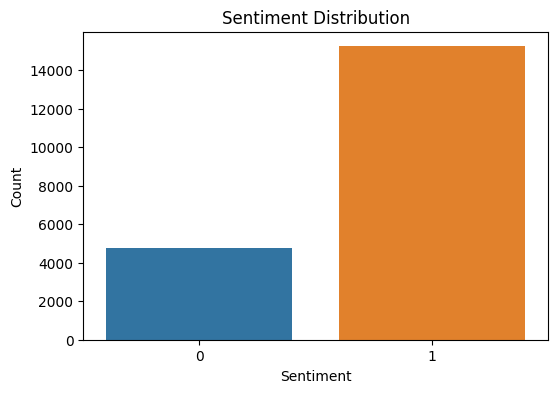

In [19]:
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

Processing Data

In [20]:
def review_process(review):
    no_punc = []
    for char in review:
        if char in string.punctuation:
            no_punc.append(' ')
        else:
            no_punc.append(char)
    no_punc = ''.join(no_punc)
    no_stopwords = [word for word in no_punc.split() if word not in stopwords and len(word)>2]
    return no_stopwords

Training

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['Sentiment'], test_size=0.2)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
pipeline = Pipeline([
    ('bow' , CountVectorizer(analyzer=review_process , ngram_range=(1,2))),
    ('classifier' , LogisticRegression())
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function review_process at 0x00000216A88F3B00>,
                                 ngram_range=(1, 2))),
                ('classifier', LogisticRegression())])

Prediction

In [22]:
prediction = pipeline.predict(X_test)
print("Accuracy :" , accuracy_score(y_test,prediction)*100)

Accuracy : 89.67500000000001


Confusion Matrix

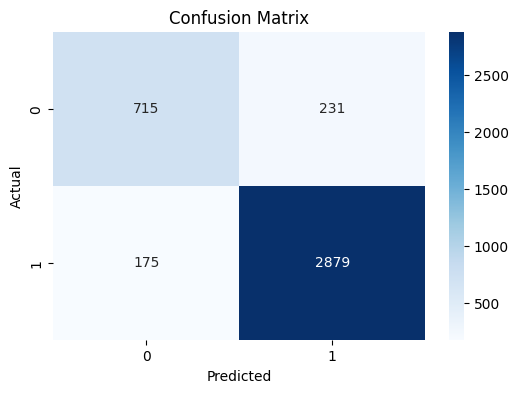

In [16]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()